In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('G02_DATOS_DEM_G1.csv')
df.FECHA = pd.to_datetime(df.FECHA, format='%d/%m/%Y')
df

,FECHA,DEM,TMAX,TMIN,FEST,ANNO,MES,DIA,DIASEM
0,2014-01-01,695.150000,14.500000,4.900000,1,2014,1,1,4
1,2014-01-02,848.520000,17.900000,8.300000,0,2014,1,2,5
2,2014-01-03,842.250000,18.000000,10.800000,0,2014,1,3,6
3,2014-01-04,790.870000,14.800000,9.900000,0,2014,1,4,7
4,2014-01-05,765.880000,15.500000,8.300000,0,2014,1,5,1
...,...,...,...,...,...,...,...,...,...
2950,2022-01-29,897.963540,14.928054,7.128469,0,2022,1,29,7
2951,2022-01-30,883.656025,14.921389,7.131950,0,2022,1,30,1
2952,2022-01-31,1016.937007,14.914723,7.135431,0,2022,1,31,2
2953,2022-02-01,1014.929731,14.908058,7.138912,0,2022,2,1,3


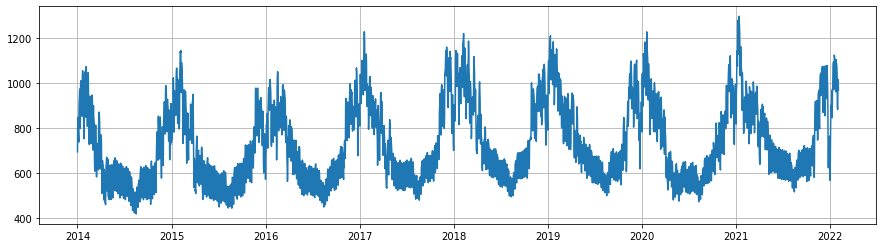

In [38]:
fig = plt.figure(1, figsize=(15, 4)) 
plt.plot(df.FECHA, df.DEM)
plt.grid()
plt.show()

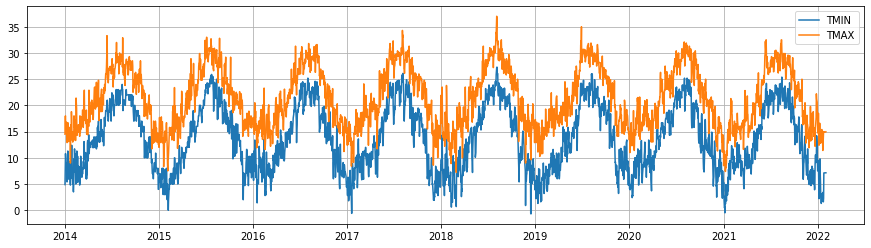

In [36]:
fig = plt.figure(1, figsize=(15, 4)) 
plt.plot(df.FECHA, df.TMIN, label = 'TMIN')
plt.plot(df.FECHA, df.TMAX, label = 'TMAX')
plt.legend()
plt.grid()
plt.show()

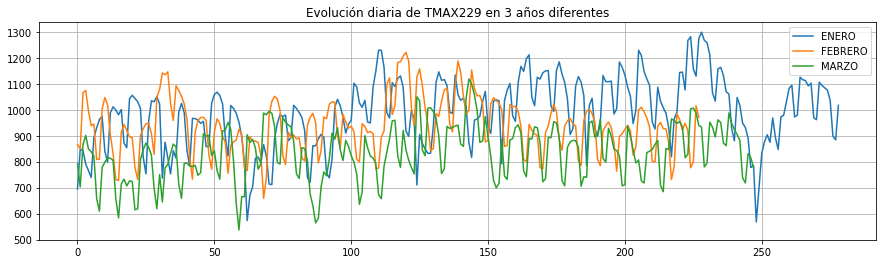

In [50]:
fig = plt.figure(3,figsize=(15,4))
plt.plot(df[df.MES == 1].DEM.tolist(), label='ENERO')
plt.plot(df[df.MES == 2].DEM.tolist(), label='FEBRERO')
plt.plot(df[df.MES == 3].DEM.tolist(),label='MARZO')
plt.title('Evolución diaria de TMAX229 en 3 años diferentes')
plt.grid()
plt.legend()
plt.show()

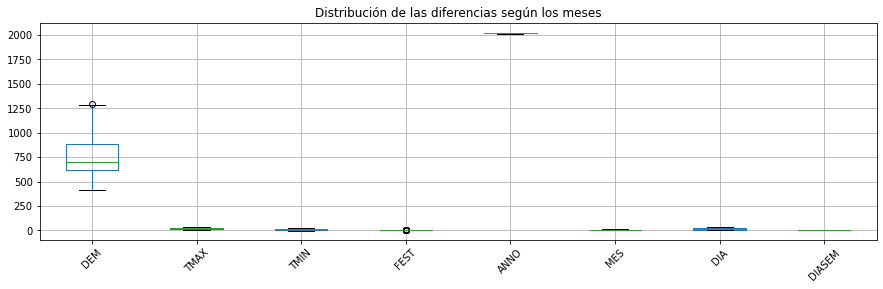

Las diferencias varían según los meses, ¿Por qué?


In [52]:
fig = plt.figure(2,figsize=(15,4))
df.boxplot(rot=45)
plt.title('Distribución de las diferencias según los meses')
plt.show()
print('Las diferencias varían según los meses, ¿Por qué?')